## DL 4 Question 1:
Follow the instruction below and then report how the performance changed.(apply all at once)
1. Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
2. Dropout layer at 20%.
3. Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
4. Max Pool layer with size 2×2.
5. Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
6. Dropout layer at 20%.
7. Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
8. Max Pool layer with size 2×2.
9. Convolutional layer, 128feature maps with a size of 3×3 and a rectifier activation function.
10. Dropout layer at 20%.
11. Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
12. Max Pool layer with size 2×2.
13. Flatten layer.
14. Dropout layer at 20%.
15. Fully connected layer with 1024units and a rectifier activation function.
16. Dropout layerat 20%.
17. Fully connected layer with 512units and a rectifier activation function.
18. Dropoutlayer at 20%
19. Fully connected output layer with 10 units and a Softmax activation function

In [1]:
# Importing the Libraries
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [8]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 122s 78ms/step - loss: 1.7030 - accuracy: 0.3837 - val_loss: 1.4261 - val_accuracy: 0.4927
Epoch 2/25
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3867 - accuracy: 0.5021 - val_loss: 1.2995 - val_accuracy: 0.5501
Epoch 3/25
1563/1563 [==============================] - 131s 84ms/step - loss: 1.2276 - accuracy: 0.5593 - val_loss: 1.1476 - val_accuracy: 0.5921
Epoch 4/25
1563/1563 [==============================] - 134s 86ms/step - loss: 1.0949 - accuracy: 0.6075 - val_loss: 1.0609 - val_accuracy: 0.6266
Epoch 5/25
1563/1563 [==============================] - 132s 84ms/step - loss: 0.9862 - accuracy: 0.6460 - val_loss: 1.0204 - val_accuracy: 0.6411
Epoch 6/25
1563/1563 [==============================] - 130s 83ms/step - loss: 0.8950 - accuracy: 0.6828 - val_loss: 0.9796 - val_accuracy: 0.6562
Epoch 7/25
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8198 - accuracy: 0.7071 - val_loss: 0

In [9]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.11%


In [10]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

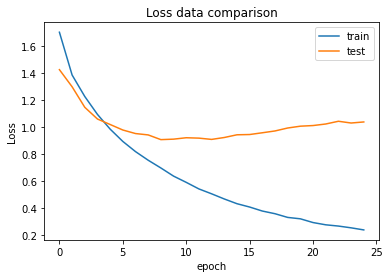

In [11]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
1. Loss of the model is 10%

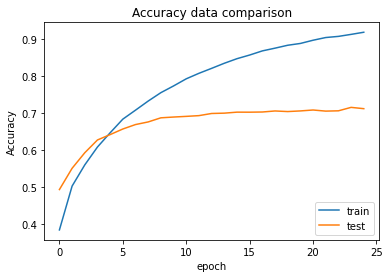

In [13]:

# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations:
1. Accuracy of the model is around 71%

In [14]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [16]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 212s 135ms/step - loss: 1.9715 - accuracy: 0.2687 - val_loss: 1.7703 - val_accuracy: 0.3586
Epoch 2/25
1563/1563 [==============================] - 220s 141ms/step - loss: 1.4947 - accuracy: 0.4548 - val_loss: 1.3773 - val_accuracy: 0.4889
Epoch 3/25
1563/1563 [==============================] - 196s 125ms/step - loss: 1.2969 - accuracy: 0.5290 - val_loss: 1.1744 - val_accuracy: 0.5728
Epoch 4/25
1563/1563 [==============================] - 203s 130ms/step - loss: 1.1540 - accuracy: 0.5852 - val_loss: 1.0807 - val_accuracy: 0.6080
Epoch 5/25
1563/1563 [==============================] - 224s 143ms/step - loss: 1.0319 - accuracy: 0.6330 - val_loss: 0.9843 - val_accuracy: 0.6476
Epoch 6/25
1563/1563 [==============================] - 196s 125ms/step - loss: 0.9393 - accuracy: 0.6653 - val_loss: 0.9089 - val_accuracy: 0.6780
Epoch 7/25
1563/1563 [==============================] - 204s 130ms/step - loss: 0.8744 - accuracy: 0.6882 - val_

In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.10%


In [18]:
model.save('convolution_model.h5')

In [19]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

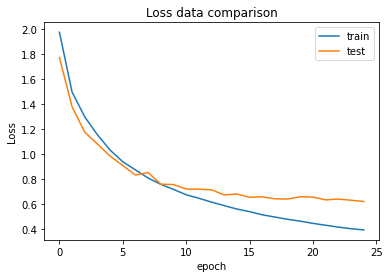

In [20]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
1. Loss of the model is 8%

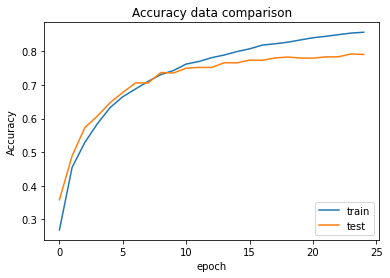

In [21]:

# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations:
1. Accuracy of the model is around 79%

## Observations :
1. Loss of the model is decreased by adding more layers.
2. Accuracy of the model is increased by adding more layers.